# Statistik-Labor Testat Aufgabe 4
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
In den Dateien **sr_aufg_4_xy_MR1.txt**, **sr_aufg_4_xy_MR 2.txt** und **sr_aufg_4_xy_MR3.txt**
(*xy = Endziffern Ihrer Matrikelnummer*) finden Sie drei verschiedene Messreihen.<br> 
Es soll jeweils untersucht werden, ob bei der Messreihe eine Normalverteilung vorliegt und falls ja, welche Normalverteilung in Frage kommt.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kde, norm
import matplotlib.pyplot as plt
import statistics as st

df1 = pd.read_csv('sr_aufg_4_96_MR1.txt', delim_whitespace=True, decimal=',', header=None, names=['MR1'])
df2 = pd.read_csv('sr_aufg_4_96_MR2.txt', delim_whitespace=True, decimal=',', header=None)
df3 = pd.read_csv('sr_aufg_4_96_MR3.txt', delim_whitespace=True, decimal=',', header=None)
def groups(df):
    return int(np.sqrt(len(df)))

## 2. Kennzahlen bestimmen
Berechnen Sie für jeden der drei Messreihen **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite**.

***Beispiellösung:***<br>
Bitte geben Sie die Kennzahlen in tabellarischer Form ab.

In [2]:
#MR1
mean1 = df1.mean()
var1 = df1.var()
std1 = df1.std()
median1 = df1.median()
spn1 = df1.max() - df1.min()

#MR2
mean2 = df2.mean()
var2 = df2.var()
std2 = df2.std()
median2 = df2.median()
spn2 = df2.max() - df2.min()

#MR3
mean3 = df3.mean()
var3 = df3.var()
std3 = df3.std()
median3 = df3.median()
spn3 = df3.max() - df3.min()

table_data = [['Mittelwert', mean1.values[0], mean2.values[0], mean3.values[0]],['Varianz', var1.values[0], var2.values[0], var3.values[0]],['Standardabweichung', std1.values[0], std2.values[0], std3.values[0]],['Median', median1.values[0], median2.values[0], median3.values[0]],['Spannweite', spn1.values[0], spn2.values[0], spn3.values[0]]]
table = pd.DataFrame(table_data, columns=['', 'MR1', 'MR2', 'MR3'])
table = table.round(4)

table

,,MR1,MR2,MR3
0,Mittelwert,558.1096,3.0284,29.4170
1,Varianz,3.9520,5.3001,0.1592
2,Standardabweichung,1.9880,2.3022,0.3990
3,Median,558.0623,3.2198,29.2971
4,Spannweite,9.9748,5.9806,1.9877


## 3. Histogramme erstellen
Erstellen Sie für jeden der drei Messreihen ein Histogramm. <br>
Erläutern Sie hierzu auch die Wahl der Klassen: 
- Wie viele Klassen haben Sie gewählt (und warum diese Anzahl von Klassen)? 
- Wie haben Sie die Klassengrenzen festgelegt und warum? Welche Funktion haben Sie beim Auszählen benutzt?

***Beispiellösung:***<br>
Darstellung aller 3 Histogramme mit zusätzlich der Beantwortung der Fragen.

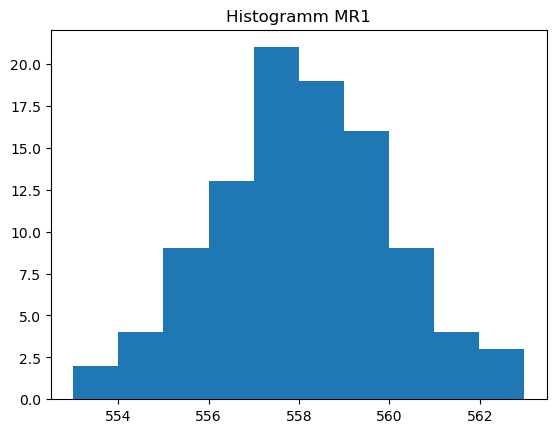

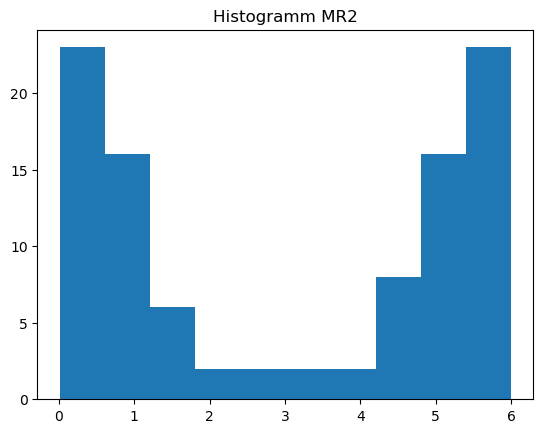

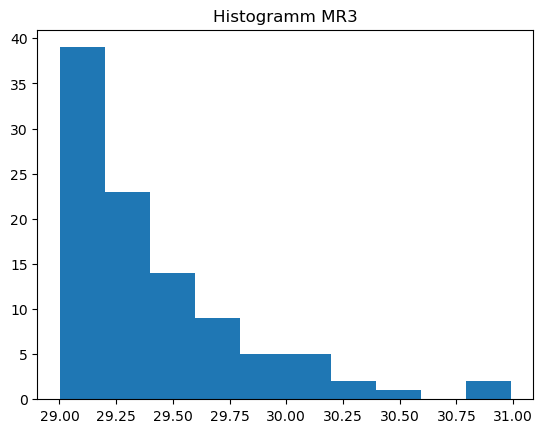

In [3]:
# plot histogramm
plt.hist(df1, bins=groups(df1), label='MR1')
plt.title('Histogramm MR1')
plt.show()
plt.hist(df2, bins=groups(df2), label='MR2')
plt.title('Histogramm MR2')
plt.show()
plt.title('Histogramm MR3')
plt.hist(df3, bins=groups(df3), label='MR3')
plt.show()

Für jedes Histogramm habe ich eine unterschiedliche Anzahl gewählt.

Die Anzahl der Klassen wird über die Faustregel sqrt(Anzahl Messwerte) bestimmmt

def groups(df):
    return int(np.sqrt(len(df)))

Zum erstellen des Histogramms habe ich die Python funktion hist() der Bibliothek matplotlib.pyplot benutzt.

## 4. Normalverteilte Daten erkennen
Entscheiden Sie anhand des Histogramms für jede der drei Messreihen, ob eine Normalverteilung vorliegt. Begründen Sie Ihre Entscheidung.

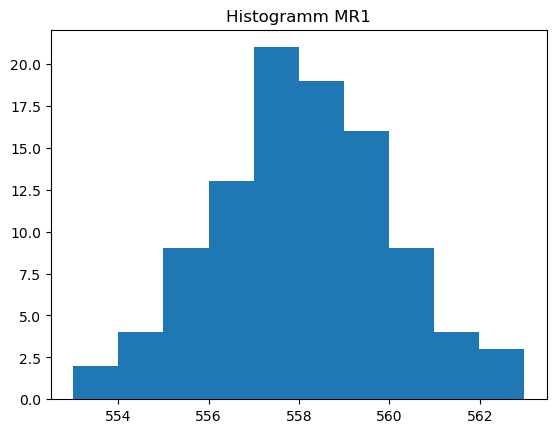

In [4]:
plt.hist(df1, bins=groups(df1), label='MR1')
plt.title('Histogramm MR1')
plt.show()
#Die Messreihe 1 ist Normalverteilt, da das Histogramm stark einer Gauß-Glocke oder auch Glockenkurve ähnelt

## 5. Dichtekurve der Normalverteilung einzeichnen
Sofern bei einer Messreihe eine Normalverteilung vorliegt, erstellen Sie ein weiteres Diagramm, das sowohl das Histogramm als auch die (an das Histogramm angepasste) Dichtekurve der passenden Normalverteilung zeigt.
- Welche Normalverteilungsdichte haben Sie gezeichnet, d. h., welche Werte haben Sie für die Parameter $\mu$ bzw. $\sigma$ eingesetzt?

***Beispiellösung*** (für den Fall, dass bei Messreihe MR1 eine Normalverteilung vorliegt):
<div>
<img src="https://drive.google.com/uc?id=1iVJQvjVW9mvBWJ_V3a4rUMJ-fdgbzqg4" width="500"/>
</div>

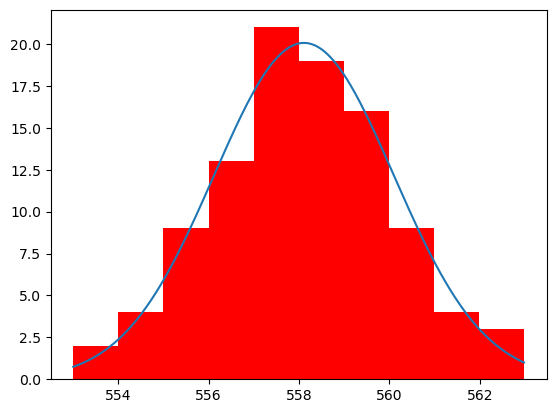

1.9880
558.1096


In [5]:
axis = np.arange(df1['MR1'].min(),df1['MR1'].max(),0.01)
nv = norm.pdf(axis, mean1, std1)

plt.hist(df1, bins=groups(df1), label='MR1', color='red')
plt.plot(axis, nv*100)

plt.show()

sigma = std1[0]
mu = mean1[0]
print("{:.4f}".format(sigma))
print("{:.4f}".format(mu))

## 6. Erläuterungen zur Dichtekurve
Erläutern Sie zu dem bei 5. gezeichneten Diagramm:
- Um welchen Faktor unterscheiden sich die im Histogramm dargestellten Anzahlen von den Funktionswerten der Normalverteilungsdichte?
- Wie haben Sie diesen Faktor bei der Erstellung des Diagramms berücksichtigt? Mussten Sie die Skalierung der y-Achse(n) ändern? Wenn ja, wie? Wenn nein, warum nicht?

In [6]:
#f.1 Die im Histogramm dargestellten Anzahlen unterscheiden sich um einen Faktor von 100 von den Funktionswerten der Normalverteilungsdicht

#f.2 Die Skalierung der Y-Achse musste nicht geändert werden, 
#statt dessen wurden die Funktionswerte der Dichtefunktion mit einem Faktor von 100 multipliziert.
#So passte die Skalierung wieder